In [1]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr

In [4]:
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams
from matplotlib import font_manager, rc
rcParams['axes.unicode_minus'] = False

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 1.주가데이터를 불러옵니다.

In [79]:
df = fdr.DataReader('005930', '2015-08-01') #삼성전자

In [80]:
df = df[['Close']]
df1 = df.iloc[0:11, :]  #10개 데이터 추출
df1 = df1.reset_index()

In [81]:
df1.tail()

,Date,Close
6,2015-08-11,23140
7,2015-08-12,23080
8,2015-08-13,22800
9,2015-08-17,22080
10,2015-08-18,22620


## 2. 이중지수평활법

In [58]:
df1['level'] = None  # 절편 위치 추가
df1['trend'] = None # 추세 위치 추가

In [59]:
df1

,Date,Close,level,trend
0,2015-08-03,23500,None,None
1,2015-08-04,23640,None,None
2,2015-08-05,23180,None,None
3,2015-08-06,22300,None,None
4,2015-08-07,22720,None,None
5,2015-08-10,22820,None,None
6,2015-08-11,23140,None,None
7,2015-08-12,23080,None,None
8,2015-08-13,22800,None,None
9,2015-08-17,22080,None,None


In [65]:
T = list(range(1,len(df1)+1))
result = ols("Close ~ T", data=df1).fit() # 10개 초기 데이터를 이용하여 회귀분석
beta = result.params


In [66]:
df2 = df.copy()

In [67]:
df2.loc[df2.index[10], 'level']  = beta[0]
df2.loc[df2.index[10], 'trend']= beta[1]

In [68]:
df2.head(15)

,Close,level,trend
Date,,,
2015-08-03,23500,NaN,NaN
2015-08-04,23640,NaN,NaN
2015-08-05,23180,NaN,NaN
2015-08-06,22300,NaN,NaN
2015-08-07,22720,NaN,NaN
2015-08-10,22820,NaN,NaN
2015-08-11,23140,NaN,NaN
2015-08-12,23080,NaN,NaN
2015-08-13,22800,NaN,NaN


In [70]:
n = 11; alpha = 0.4; beta = 0.4

for i in range(n, len(df2)):
    
    df2.loc[df2.index[i], 'level']= alpha * df2.loc[df2.index[i], 'Close'] + (1-alpha)*(df2.loc[df2.index[i-1], 'level']+df2.loc[df2.index[i-1], 'trend'])
    df2.loc[df2.index[i], 'trend']= beta *(df2.loc[df2.index[i],'level'] - df2.loc[df2.index[i-1], 'level']) + (1-beta)*(df2.loc[df2.index[i-1],'trend'])


In [71]:
df2['Forecast']= (df2['level']  + df2['trend']).shift(1)

In [72]:
df2.tail

<bound method NDFrame.tail of             Close         level       trend      Forecast
Date                                                     
2015-08-03  23500           NaN         NaN           NaN
2015-08-04  23640           NaN         NaN           NaN
2015-08-05  23180           NaN         NaN           NaN
2015-08-06  22300           NaN         NaN           NaN
2015-08-07  22720           NaN         NaN           NaN
...           ...           ...         ...           ...
2023-02-10  62800  62700.620745   67.953766  62634.367908
2023-02-13  62900  62821.144706   88.981844  62768.574511
2023-02-14  63200  63026.075930  135.361596  62910.126551
2023-02-15  62200  62776.862516  -18.468408  63161.437527
2023-02-16  63400  63015.036465   84.188535  62758.394108

[1856 rows x 4 columns]>

In [73]:
df2a = df2.dropna()

In [74]:
df2a.head()

,Close,level,trend,Forecast
Date,,,,
2015-08-19,23080,23238.181818,-131.272727,23343.636364
2015-08-20,22780,22976.145455,-183.578182,23106.909091
2015-08-21,22020,22483.540364,-307.188945,22792.567273
2015-08-24,21580,21937.810851,-402.605172,22176.351418
2015-08-25,21580,21553.123407,-395.438081,21535.205679


In [76]:
df2a = df2a.reset_index()

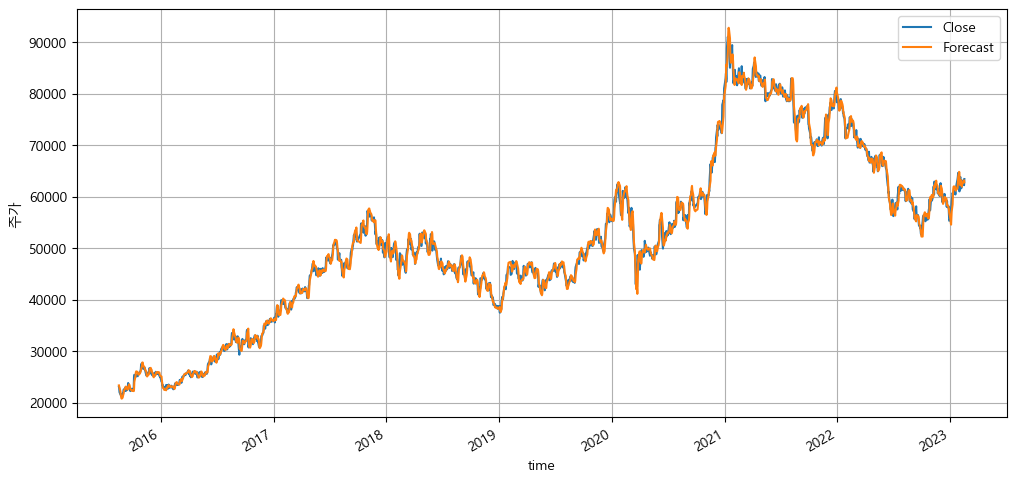

In [77]:
fig, ax = plt.subplots(nrows=1, figsize=(12, 6), sharex=True)
df2a.plot(x = 'Date', y='Close', ax=ax)
df2a.plot(x = 'Date', y='Forecast',  ax=ax)
ax.set(xlabel="time", ylabel="주가")
ax.grid(True)
plt.show()